# Plot Ablation Performance Metrics

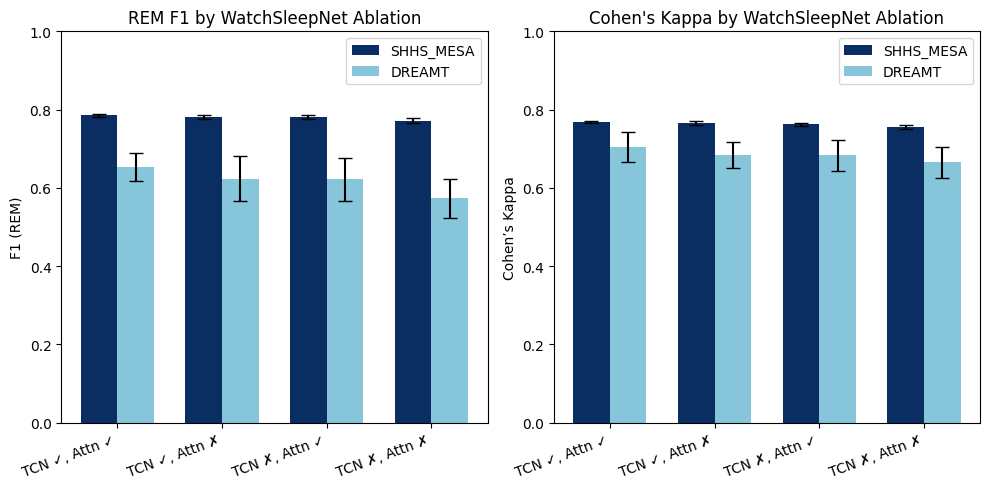

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Data
shhs_mesa_cv_rem_f1_mean = [0.786, 0.782, 0.781, 0.772]
shhs_mesa_cv_rem_f1_std  = [0.0040, 0.0055, 0.0047, 0.0064]

dreamt_cv_rem_f1_mean    = [0.654, 0.623, 0.622, 0.574]
dreamt_cv_rem_f1_std     = [0.036, 0.0576, 0.0552, 0.0499]

shhs_mesa_cv_kappa_mean  = [0.769, 0.766, 0.762, 0.756]
shhs_mesa_cv_kappa_std   = [0.0026, 0.0042, 0.0036, 0.0043]

dreamt_cv_kappa_mean     = [0.705, 0.683, 0.683, 0.665]
dreamt_cv_kappa_std      = [0.038, 0.0334, 0.0390, 0.0387]

# Fold labels with check (✓) and cross (✗) for TCN and Attention
fold_labels = [
    'TCN ✓, Attn ✓',
    'TCN ✓, Attn ✗',
    'TCN ✗, Attn ✓',
    'TCN ✗, Attn ✗'
]

x = np.arange(len(shhs_mesa_cv_rem_f1_mean))  # [0, 1, 2, 3]
width = 0.35

# Create the figure and axes
fig, axes = plt.subplots(1, 2, figsize=(10, 5), sharey=False)

##############################
# 1) REM F1 subplot
##############################
ax1 = axes[0]

# Bars for SHHS_MESA (darker blue)
ax1.bar(
    x - width/2,
    shhs_mesa_cv_rem_f1_mean,
    width,
    yerr=shhs_mesa_cv_rem_f1_std,
    capsize=5,
    color='#0a2e61',           # darker blue
    label='SHHS_MESA'
)

# Bars for DREAMT (lighter blue)
ax1.bar(
    x + width/2,
    dreamt_cv_rem_f1_mean,
    width,
    yerr=dreamt_cv_rem_f1_std,
    capsize=5,
    color='#86c5da',           # lighter blue
    label='DREAMT'
)

# Set labels and title
ax1.set_xticks(x)
ax1.set_xticklabels(fold_labels, rotation=20, ha='right')  # rotate if needed
ax1.set_ylim([0, 1])  # Adjust if needed
ax1.set_ylabel('F1 (REM)')
ax1.set_title('REM F1 by WatchSleepNet Ablation')
ax1.legend()

##############################
# 2) Cohen’s Kappa subplot
##############################
ax2 = axes[1]

# Bars for SHHS_MESA (darker blue)
ax2.bar(
    x - width/2,
    shhs_mesa_cv_kappa_mean,
    width,
    yerr=shhs_mesa_cv_kappa_std,
    capsize=5,
    color='#0a2e61',           # darker blue
    label='SHHS_MESA'
)

# Bars for DREAMT (lighter blue)
ax2.bar(
    x + width/2,
    dreamt_cv_kappa_mean,
    width,
    yerr=dreamt_cv_kappa_std,
    capsize=5,
    color='#86c5da',           # lighter blue
    label='DREAMT'
)

# Set labels and title
ax2.set_xticks(x)
ax2.set_xticklabels(fold_labels, rotation=20, ha='right')  # rotate if needed
ax2.set_ylim([0, 1])  # Adjust if needed
ax2.set_ylabel('Cohen’s Kappa')
ax2.set_title("Cohen's Kappa by WatchSleepNet Ablation")
ax2.legend()

plt.tight_layout()
plt.show()


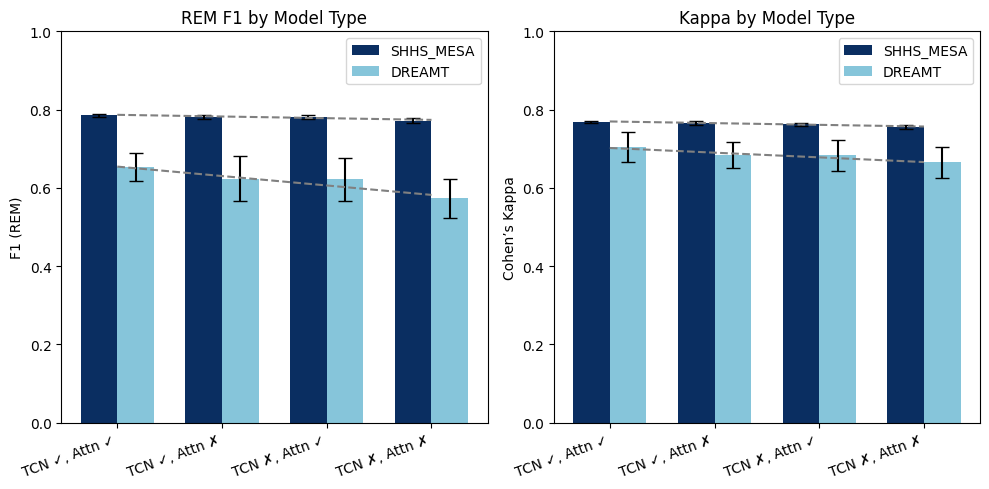

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Data
shhs_mesa_cv_rem_f1_mean = [0.786, 0.782, 0.781, 0.772]
shhs_mesa_cv_rem_f1_std  = [0.0040, 0.0055, 0.0047, 0.0064]

dreamt_cv_rem_f1_mean    = [0.654, 0.623, 0.622, 0.574]
dreamt_cv_rem_f1_std     = [0.036, 0.0576, 0.0552, 0.0499]

shhs_mesa_cv_kappa_mean  = [0.769, 0.766, 0.762, 0.756]
shhs_mesa_cv_kappa_std   = [0.0026, 0.0042, 0.0036, 0.0043]

dreamt_cv_kappa_mean     = [0.705, 0.683, 0.683, 0.665]
dreamt_cv_kappa_std      = [0.038, 0.0334, 0.0390, 0.0387]

# Fold labels with check (✓) and cross (✗)
fold_labels = [
    'TCN ✓, Attn ✓',
    'TCN ✓, Attn ✗',
    'TCN ✗, Attn ✓',
    'TCN ✗, Attn ✗'
]

# x-positions for bars (folds)
x = np.arange(len(shhs_mesa_cv_rem_f1_mean))  # [0, 1, 2, 3]
width = 0.35

# Create figure and axes
fig, axes = plt.subplots(1, 2, figsize=(10, 5), sharey=False)

##############################
# 1) REM F1 subplot
##############################
ax1 = axes[0]

# Bars for SHHS_MESA (darker blue)
ax1.bar(
    x - width/2,
    shhs_mesa_cv_rem_f1_mean,
    width,
    yerr=shhs_mesa_cv_rem_f1_std,
    capsize=5,
    color='#0a2e61',   # darker blue
    label='SHHS_MESA'
)

# Bars for DREAMT (lighter blue)
ax1.bar(
    x + width/2,
    dreamt_cv_rem_f1_mean,
    width,
    yerr=dreamt_cv_rem_f1_std,
    capsize=5,
    color='#86c5da',   # lighter blue
    label='DREAMT'
)

# Extend x-range for the fitted lines (e.g., from -0.5 to 3.5)
x_extend = np.linspace(-0.5, len(x) - 0.5, 100)

# Fit and plot dashed linear line (SHHS_MESA)
shhs_fit = np.polyfit(x, shhs_mesa_cv_rem_f1_mean, 1)
ax1.plot(
    x_extend,
    np.poly1d(shhs_fit)(x_extend),
    '--', color='gray'
)

# Fit and plot dashed linear line (DREAMT)
dreamt_fit = np.polyfit(x, dreamt_cv_rem_f1_mean, 1)
ax1.plot(
    x_extend,
    np.poly1d(dreamt_fit)(x_extend),
    '--', color='gray'
)

# Set labels and title
ax1.set_xticks(x)
ax1.set_xticklabels(fold_labels, rotation=20, ha='right')
ax1.set_ylim([0, 1])
ax1.set_ylabel('F1 (REM)')
ax1.set_title('REM F1 by Model Type')
ax1.legend()

##############################
# 2) Cohen’s Kappa subplot
##############################
ax2 = axes[1]

# Bars for SHHS_MESA (darker blue)
ax2.bar(
    x - width/2,
    shhs_mesa_cv_kappa_mean,
    width,
    yerr=shhs_mesa_cv_kappa_std,
    capsize=5,
    color='#0a2e61',   # darker blue
    label='SHHS_MESA'
)

# Bars for DREAMT (lighter blue)
ax2.bar(
    x + width/2,
    dreamt_cv_kappa_mean,
    width,
    yerr=dreamt_cv_kappa_std,
    capsize=5,
    color='#86c5da',   # lighter blue
    label='DREAMT'
)

# Use same extended x-range for the fitted lines
shhs_fit_k = np.polyfit(x, shhs_mesa_cv_kappa_mean, 1)
dreamt_fit_k = np.polyfit(x, dreamt_cv_kappa_mean, 1)

ax2.plot(
    x_extend,
    np.poly1d(shhs_fit_k)(x_extend),
    '--', color='gray'
)
ax2.plot(
    x_extend,
    np.poly1d(dreamt_fit_k)(x_extend),
    '--', color='gray'
)

# Set labels and title
ax2.set_xticks(x)
ax2.set_xticklabels(fold_labels, rotation=20, ha='right')
ax2.set_ylim([0, 1])
ax2.set_ylabel('Cohen’s Kappa')
ax2.set_title('Kappa by Model Type')
ax2.legend()

plt.tight_layout()

# Save figure as a PNG (300 dpi is usually good for print)
plt.savefig('f1_kappa_plot.png', dpi=300, bbox_inches='tight')

plt.show()
